# Story


In [1]:
%run set_theme.ipynb

In [2]:
# @hidden_cell

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import statsmodels.api as sm

In [3]:
work_life_balance_df = pd.read_csv('../data/Cities with the Best Work-Life Balance 2022.csv')
healthy_lifestyle_df = pd.read_csv('../data/healthy_lifestyle_city_2021.csv')
living_wage_df = pd.read_csv('../data/livingwage (2).csv')
ua_scores_df = pd.read_csv('../data/uaScoresDataFrame.csv')
train_df = pd.read_csv('../data/train.csv')
cities_df = pd.read_csv('../data/worldcities.csv')
moving_best_cities_df = pd.read_csv('../data/Movinga_best_cities.csv')
best_cities_df = pd.read_csv('../data/GreenCities-Data.csv')

# Display the first few rows of each dataframe to understand their structure
(work_life_balance_df.head(), healthy_lifestyle_df.head(), living_wage_df.head(), ua_scores_df.head())

(   2022 2021        City      Country Remote Jobs Overworked Population  \
 0     1    2        Oslo       Norway      41.72%                11.20%   
 1     2    -        Bern  Switzerland      44.86%                11.40%   
 2     3    1    Helsinki      Finland      38.92%                12.70%   
 3     4    3      Zurich  Switzerland      44.86%                11.90%   
 4     5    5  Copenhagen      Denmark      41.42%                10.50%   
 
    Minimum Vacations Offered (Days) Vacations Taken (Days)  Unemployment  \
 0                                25                     25          94.7   
 1                                20                     25          99.8   
 2                                25                     30          89.3   
 3                                20                     25          99.2   
 4                                25                     28          94.8   
 
   Multiple Jobholders  ... Healthcare Access to Mental Healthcare  \
 0      

In [4]:
work_life_balance_df.columns = work_life_balance_df.columns.str.strip().str.replace(' ', '_').str.lower()
work_life_balance_df = work_life_balance_df.rename(columns={'2022': 'rank_2022', '2021': 'rank_2021', 'multiple_jobholders': 'multiple_jobholders_%'})

percentage_columns = ['remote_jobs', 'overworked_population', 'multiple_jobholders_%']

work_life_balance_df.head()

,rank_2022,rank_2021,city,country,remote_jobs,overworked_population,minimum_vacations_offered_(days),vacations_taken_(days),unemployment,multiple_jobholders_%,...,healthcare,access_to_mental_healthcare,inclusivity_&_tolerance,affordability,"happiness,_culture_&_leisure",city_safety,outdoor_spaces,air_quality,wellness_and_fitness,total_score
0,1,2,Oslo,Norway,41.72%,11.20%,25,25,94.7,9.10%,...,100.0,85.0,93.2,59.4,88.8,86.5,95.6,97.5,65.7,100.00
1,2,-,Bern,Switzerland,44.86%,11.40%,20,25,99.8,7.60%,...,99.6,78.6,94.6,69.9,100.0,91.8,87.1,100.0,69.1,99.46
2,3,1,Helsinki,Finland,38.92%,12.70%,25,30,89.3,6.30%,...,96.7,73.0,93.9,65.0,96.3,94.9,86.0,97.0,68.3,99.24
3,4,3,Zurich,Switzerland,44.86%,11.90%,20,25,99.2,7.60%,...,99.2,78.6,87.5,71.6,91.5,92.8,84.0,96.2,68.7,96.33
4,5,5,Copenhagen,Denmark,41.42%,10.50%,25,28,94.8,7.60%,...,94.8,77.6,95.2,65.3,92.5,95.7,75.5,95.1,66.3,96.21


In [5]:
# Clean and preprocess living wage data
living_wage_df.columns = living_wage_df.columns.str.strip().str.replace(' ', '_').str.lower()

# Ensure consistency in city and country names
living_wage_df.rename(columns={'city': 'city_name', 'country': 'country_name'}, inplace=True)

living_wage_df.head()

,rank_2020,city_name,state,population_2020,population_2010,land_area_sqmi,density,one_adult_no_kids_living_wage,one_adult_one_kid_living_wage,one_adult_two_kids_living_wage,one_adult_three_kids_living_wage,two_adults_one_working_no_kids_living_wage,two_adults_one_working_one_kid_living_wage,two_adults_one_working_two_kids_living_wage,two_adults_one_working_three_kids_living_wage,two_adults_both_working_no_kids_living_wage,two_adults_both_working_one_kid_living_wage,two_adults_both_working_two_kids_living_wage,two_adults_both_working_three_kids_living_wage
0,1,New York,New York,8804190,8175133,300.5,29298,20.00,38.99,49.18,64.30,29.16,34.35,38.13,42.42,14.03,20.95,26.53,32.40
1,2,Los Angeles,California,3898747,3792621,469.5,8304,19.22,41.55,51.30,67.56,31.01,37.96,41.94,47.75,14.62,22.36,27.73,34.01
2,3,Chicago,Illinois,2746388,2695598,227.7,12061,16.08,32.25,40.20,51.69,25.41,29.73,33.38,35.93,12.28,17.52,22.01,25.94
3,4,Houston,Texas,2304580,2099451,640.4,3599,14.29,29.09,35.73,46.02,22.88,27.54,30.93,33.69,11.14,15.85,19.63,23.09
4,5,Phoenix,Arizona,1608139,1445632,518.0,3105,15.41,29.44,35.40,46.01,24.85,29.25,32.98,36.95,12.03,16.21,19.65,23.23


In [6]:
# Clean and preprocess UA Scores data
ua_scores_df.columns = ua_scores_df.columns.str.strip().str.replace(' ', '_').str.lower()

ua_scores_df.head()

,unnamed:_0,ua_name,ua_country,ua_continent,housing,cost_of_living,startups,venture_capital,travel_connectivity,commute,...,safety,healthcare,education,environmental_quality,economy,taxation,internet_access,leisure_&_culture,tolerance,outdoors
0,0,Aarhus,Denmark,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,...,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300
1,1,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,...,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310
2,2,Albuquerque,New Mexico,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,...,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155
3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,...,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000
4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,...,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070


In [7]:
work_life_balance_df['vacations_taken_(days)'] = pd.to_numeric(work_life_balance_df['vacations_taken_(days)'], errors='coerce')
work_life_balance_df['minimum_vacations_offered_(days)'] = pd.to_numeric(work_life_balance_df['minimum_vacations_offered_(days)'], errors='coerce')

In [8]:
train_df.head()

,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [9]:
european_cities = [
    "London",
    "Paris",
    "Berlin",
    "Amsterdam",
    "Barcelona",
    "Lisbon",
    "Rome",
    "Athens",
    "Vienna",
    "Dublin",
    "Copenhagen",
    "Stockholm",
    "Oslo",
    "Helsinki",
    "Prague",
    "Budapest",
    "Warsaw",
    "Sofia",
    "Belgrade",
]

In [10]:
# @hidden_cell
ua_scores_df['ua_country'] = ua_scores_df['ua_country'].str.strip()

countries = ['Netherlands', 'Sweden', 'Norway', 'Serbia', 'Bulgaria', 'Slovakia']

subset_df_big = ua_scores_df[ua_scores_df['ua_country'].isin(countries)]

fig_bubble = px.scatter(
    subset_df_big,
    x='healthcare',
    y='education',
    size='economy',
    color='ua_country',
    hover_name='ua_name',
    title='Healthcare and Education Scores vs Economy',
    labels={
        'ua_country': 'Country',
        'healthcare': 'Healthcare',
        'education': 'Education',
        'economy': 'Economy Score'
    },
    size_max=25
)

fig_bubble.update_layout(
    xaxis_title='Healthcare',
    yaxis_title='Education',
)

fig_bubble.add_annotation(
                    x=0, y=-0.263,
                    xref='paper',
                    yref='paper',
                    showarrow=False,
                    xanchor='left',
                    yanchor='bottom',
                    align='left',
                    text='The size of the bubble corresponds to the economy of that city.', 
)

fig_bubble.show()

In [11]:
ua_renamed_df = ua_scores_df.rename(columns={'ua_name': 'City'})
merged_ua_train_df = pd.merge(train_df, ua_renamed_df, on='City')

subset_df = merged_ua_train_df[merged_ua_train_df['City'].isin(['Belgrade', 'Amsterdam', 'Sofia'])]

subset_df.head()

# subset_df_to_use['Happiness_Score'].head()

# Radar chart
fig_radar = go.Figure()

for _, row in subset_df.iterrows():
    fig_radar.add_trace(go.Scatterpolar(
        r=[row['healthcare'], row['education'], row['economy'], row['Happiness_Score']],
        theta=['Healthcare', 'Education', 'Economy', 'Happiness'],
        fill='toself',
        name=row['City']
    ))

fig_radar.update_layout(
    polar=dict(
        radialaxis=dict(visible=True)
    ),
    title='Safety, Healthcare, and Education Scores vs Economy zoomed in'
)

fig_radar.show()

In [17]:
renamed_train_df = train_df.rename(columns={'City': 'city'})

merged_latlong_train = pd.merge(cities_df, renamed_train_df, on='city')

df_to_use = merged_latlong_train.dropna(subset=['lat', 'lng', 'Green_Space_Area'])

df_to_use['Happiness_Score'] = pd.to_numeric(df_to_use['Happiness_Score'])

filtered_df_to_use = df_to_use[df_to_use['Happiness_Score'] > -10]
filtered_df_to_use = filtered_df_to_use[filtered_df_to_use['city'].isin(european_cities)]
filtered_df_to_use = filtered_df_to_use[filtered_df_to_use['lng'] > -10]

fig_map = px.scatter_mapbox(
    filtered_df_to_use,
    lat='lat',
    lon='lng',
    hover_name='city',
    hover_data={'Green_Space_Area': True, 'Happiness_Score': True},
    size='Green_Space_Area',
    color='Happiness_Score',
    labels={'Happiness_Score': 'Happiness Score'},
    color_continuous_scale=px.colors.sequential.Plotly3,
    title='Greenspace Area and Happiness Score by City',
    zoom=1,
    
)

fig_map.update_layout(
    mapbox_style="open-street-map",
    mapbox_zoom=2.3,
    margin={"t":40, "l":10,"b":40}
)

fig_map.add_annotation(
                    x=0, y=-0.1,
                    xref='paper',
                    yref='paper',
                    showarrow=False,
                    xanchor='left',
                    yanchor='bottom',
                    align='left',
                    text='The size of the bubble corresponds to the Greenspace area of that city', 
)

fig_map.show()

In [19]:

train_europe_df = train_df[train_df['City'].isin(european_cities)]

cities = train_europe_df['City']
air_quality_index = train_europe_df['Air_Quality_Index']
happiness_score = train_europe_df['Happiness_Score']

# Create traces for the bar chart
trace1 = go.Bar(
    x=cities,
    y=happiness_score,
    name='Happiness Score',
    yaxis='y1',
    offsetgroup=1,
    marker=dict(color='#F280F7')
)

trace2 = go.Bar(
    x=cities,
    y=(100 - air_quality_index),
    name='Air Quality Index',
    yaxis='y2',
    offsetgroup=2,
    marker=dict(color='#4c75eb')
)

# Create the layout with two y-axes
layout = go.Layout(
    title='Happiness Score and Air Quality Index by City',
    yaxis=dict(
        title='Happiness Score',
        titlefont=dict(color='#F280F7'),
        tickfont=dict(color='#F280F7'),
        range=[2, max(happiness_score)]
    ),
    yaxis2=dict(
        title='Air Quality Index',
        titlefont=dict(color='#4c75eb'),
        tickfont=dict(color='#4c75eb'),
        overlaying='y',
        side='right',
        showgrid=False,
    ),
    xaxis=dict(
        title='City'
    ),
    barmode='group'
)

# Create the figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig.show()


In [27]:
merged_best_train_df = pd.merge(renamed_train_df, best_cities_df, on='city')

best_train_filtered_df = merged_best_train_df[merged_best_train_df['city'].isin(european_cities)]

best_train_filtered_df.head()

profit = best_train_filtered_df['Profit']
happiness_score = best_train_filtered_df['Happiness_Score']

# Fit the regression line using statsmodels
X = sm.add_constant(80 - profit)  # Adding a constant for the intercept
model = sm.OLS(happiness_score, X).fit()
trendline = model.predict(X)

# Create scatter plot with different colors for each city
scatter_plot = px.scatter(
    best_train_filtered_df,
    x=(80 - profit),
    y='Happiness_Score',
    color='city',
    hover_name='city',
    labels={'city': 'City'},
    title='Profit in comparison to Happiness',
)

# Add the regression line to the scatter plot
scatter_plot.add_trace(
    go.Scatter(
        x=(80 - profit),
        y=trendline,
        mode='lines',
        name='Trendline',
        line=dict(color='#4c75eb')
    )
)

scatter_plot.update_traces(marker=dict(size=15))

scatter_plot.update_layout(
    xaxis_title='Profit',
    yaxis_title='Happiness Score'
)

scatter_plot.show()

/var/folders/ct/jf_08df550xfjwz0vgn47cz80000gn/T/ipykernel_80437/1747076211.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



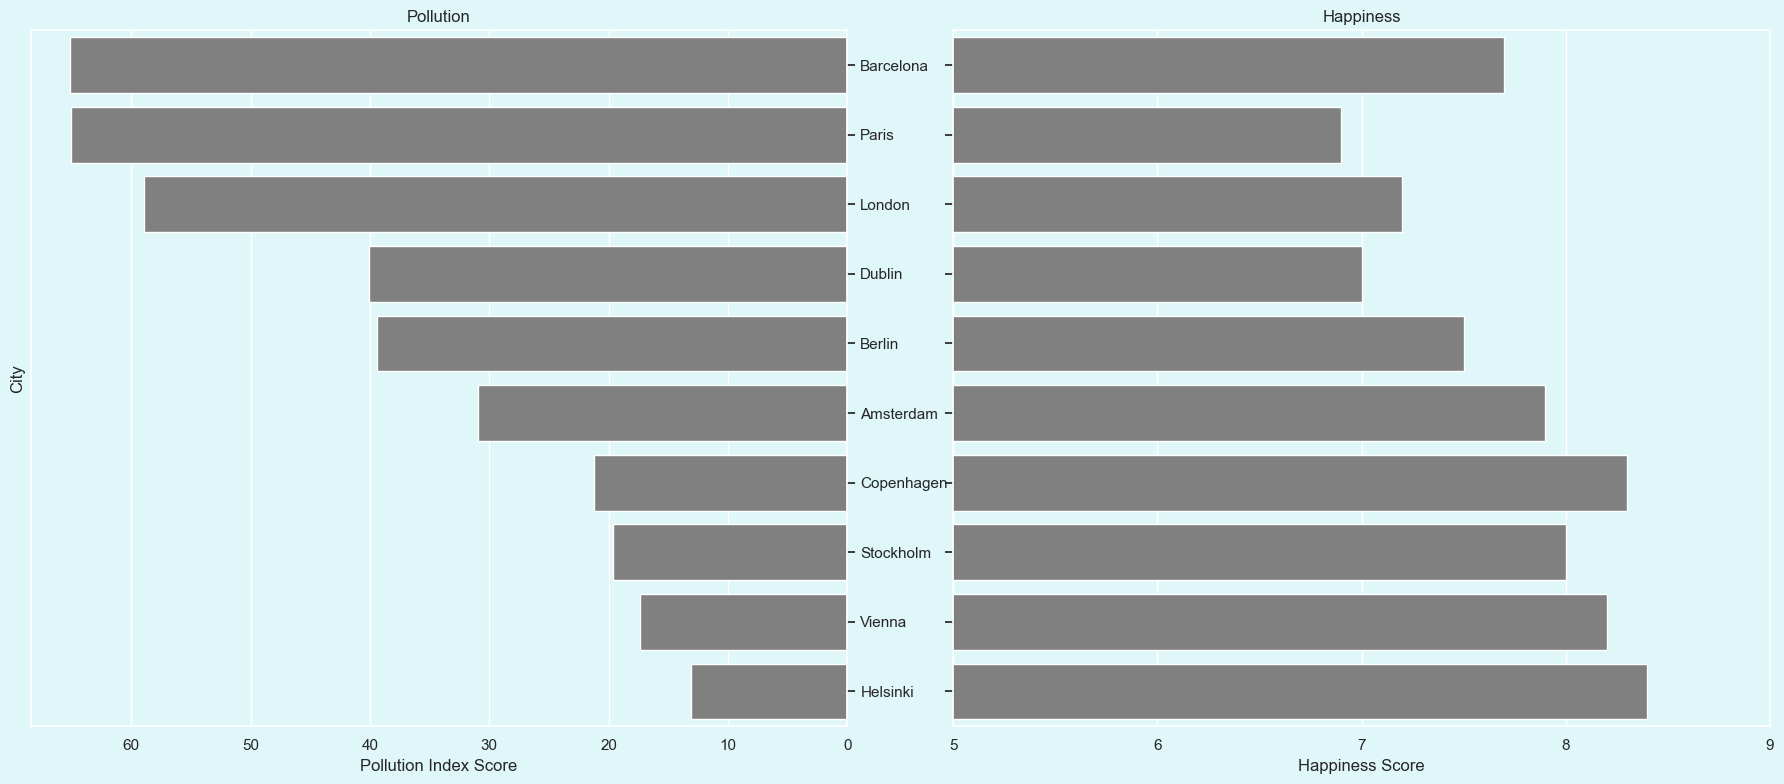

In [33]:
merged_train_healthy_lifestyle_df = pd.merge(train_df, healthy_lifestyle_df, on='City')

merged_train_healthy_lifestyle_filtered_df = merged_train_healthy_lifestyle_df[merged_train_healthy_lifestyle_df['City'].isin(european_cities)]

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(18, 8))

sns.set_theme(rc={'axes.facecolor': '#E0F7FA', 'figure.facecolor': '#E0F7FA'})

merged_train_healthy_lifestyle_filtered_df.sort_values(by='Pollution(Index score) (City)', ascending=False, inplace=True)

sns.barplot(x=pd.to_numeric(merged_train_healthy_lifestyle_filtered_df['Pollution(Index score) (City)']), y='City', data=merged_train_healthy_lifestyle_filtered_df, ax=axes[0], color='gray')
sns.barplot(x=pd.to_numeric(merged_train_healthy_lifestyle_filtered_df['Happiness_Score']), y='City', data=merged_train_healthy_lifestyle_filtered_df, ax=axes[1], color='gray')

axes[0].set(title='Pollution')
axes[0].set_xlabel('Pollution Index Score')
axes[1].set(title='Happiness')
axes[1].set_xlabel('Happiness Score')

axes[0].invert_xaxis()
axes[0].yaxis.tick_right()

axes[1].yaxis.tick_left()

axes[1].set_xlim(5, 9)
axes[1].set_xticks(range(5, 10, 1))

fig.tight_layout()
fig.subplots_adjust(wspace=0.13)

fig.set_facecolor('#E0F7FA')

plt.show()